# More realistic handwritten digits - MNIST dataset

The *Hello world* of Machine Learning


- more complex dataset than before
- but still very far from the current state-of-art challanges 

In [1]:
%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt

In [2]:
X=load('train.npz')['arr_0']
y=load('trainlabels.npz')['arr_0']
Xt=load('test.npz')['arr_0']
yt=load('testlabels.npz')['arr_0']

In [3]:
print X.shape, amin(X), amax(X)
print Xt.shape, amin(Xt), amax(Xt)

(33600, 784) 0.0 1.0
(8400, 784) 0.0 1.0


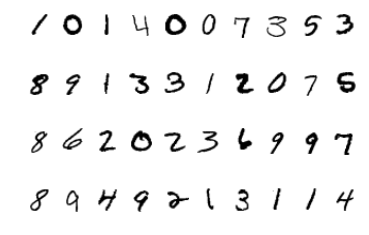

In [4]:
for i in range(40):
    plt.subplot(4,10,i+1)
    plt.axis('off')
    plt.imshow(X[i].reshape((28,28)),cmap=plt.cm.gray_r)
plt.show()

In [5]:
print y[:40]

[ 1.  0.  1.  4.  0.  0.  7.  3.  5.  3.  8.  9.  1.  3.  3.  1.  2.  0.
  7.  5.  8.  6.  2.  0.  2.  3.  6.  9.  9.  7.  8.  9.  4.  9.  2.  1.
  3.  1.  1.  4.]


## Logistic Regression

In [8]:
from sklearn.linear_model import *
from sklearn.metrics import *

In [21]:
clf=LogisticRegression()
%time clf.fit(X,y)

CPU times: user 34.3 s, sys: 40 ms, total: 34.3 s
Wall time: 34.4 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
preds=clf.predict(Xt)
print accuracy_score(yt,preds)

0.917857142857


In [23]:
print preds[:10], yt[:10]

[ 0.  7.  7.  2.  2.  6.  5.  7.  5.  5.] [ 0.  7.  7.  2.  2.  6.  5.  7.  8.  5.]


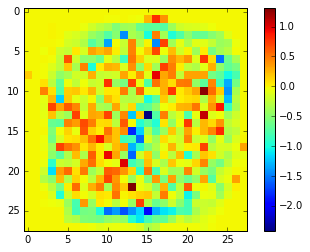

In [24]:
cfs0=clf.coef_[0].reshape((28,28))
plt.imshow(cfs0,interpolation="nearest")
plt.colorbar()
plt.show()

In [10]:
clf=LogisticRegressionCV()
%time clf.fit(X,y)
preds=clf.predict(Xt)
print accuracy_score(yt,preds)

CPU times: user 22min 21s, sys: 7.88 s, total: 22min 29s
Wall time: 3min 44s
0.919285714286


In [11]:
clf.C_

array([ 0.35938137,  0.35938137,  0.35938137,  0.35938137,  0.35938137,
        0.35938137,  0.04641589,  0.35938137,  0.04641589,  0.35938137])

## Support Vector Machine

In [12]:
from sklearn.svm import SVC
clf = SVC()
%time clf.fit(X,y)
preds=clf.predict(Xt)
print accuracy_score(yt,preds)

CPU times: user 3min 23s, sys: 160 ms, total: 3min 23s
Wall time: 3min 23s
0.937142857143


In [13]:
clf = SVC(C=100)
%time clf.fit(X,y)
preds=clf.predict(Xt)
print accuracy_score(yt,preds)

CPU times: user 1min 28s, sys: 112 ms, total: 1min 28s
Wall time: 1min 28s
0.96619047619


## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [15]:
clf=RFC(n_estimators=100)
%time clf.fit(X,y)
preds=clf.predict(Xt)
print accuracy_score(yt,preds)

CPU times: user 15 s, sys: 0 ns, total: 15 s
Wall time: 15 s
0.965833333333


In [24]:
clf=RFC(n_estimators=500)
%time clf.fit(X,y)
preds=clf.predict(Xt)
print accuracy_score(yt,preds)

CPU times: user 1min 14s, sys: 80 ms, total: 1min 14s
Wall time: 1min 14s
0.9675


## Gradient Boosted Trees

The sklearn GradientBoostingClassifier takes too long...
Use `xgboost`

In [16]:
from xgboost import XGBClassifier

In [17]:
clf=XGBClassifier(max_depth=5, n_estimators=100)
%time clf.fit(X,y)
preds=clf.predict(Xt)
print accuracy_score(yt,preds)

CPU times: user 27min 3s, sys: 5.32 s, total: 27min 8s
Wall time: 2min 16s
0.96119047619


## Nearest neighbors

This **should not** be used for such high dimensional data (dim=**784**) but let's try nevertheless...

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
clf=KNeighborsClassifier()
%time clf.fit(X,y)
%time preds=clf.predict(Xt)
print accuracy_score(yt,preds)

CPU times: user 5.17 s, sys: 160 ms, total: 5.33 s
Wall time: 5.33 s
CPU times: user 5min 24s, sys: 112 ms, total: 5min 24s
Wall time: 5min 24s
0.969047619048


#### Use PCA (*Principal Components Analysis*) to reduce dimensionality and only then apply Nearest neighbors

In [20]:
from sklearn.decomposition import RandomizedPCA

In [21]:
pca=RandomizedPCA(n_components=20)

In [22]:
%time Xpca=pca.fit_transform(X)
Xpcat=pca.transform(Xt)

CPU times: user 13.9 s, sys: 3.99 s, total: 17.9 s
Wall time: 4.26 s


In [23]:
clf=KNeighborsClassifier()
%time clf.fit(Xpca,y)
%time preds=clf.predict(Xpcat)
print accuracy_score(yt,preds)

CPU times: user 72 ms, sys: 8 ms, total: 80 ms
Wall time: 79.3 ms
CPU times: user 3.02 s, sys: 0 ns, total: 3.02 s
Wall time: 3.02 s
0.968571428571


## Neural Networks

In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.layers.advanced_activations import *

Using Theano backend.


Try the previous one...

In [4]:
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
%time model.fit(X, y, nb_epoch=30, batch_size=64, validation_data=(Xt,yt))

Train on 33600 samples, validate on 8400 samples
Epoch 1/30
33600/33600 [==============================] - 1s - loss: 0.4059 - acc: 0.8846 - val_loss: 0.2006 - val_acc: 0.9415
Epoch 2/30
33600/33600 [==============================] - 1s - loss: 0.1761 - acc: 0.9478 - val_loss: 0.1517 - val_acc: 0.9571
Epoch 3/30
33600/33600 [==============================] - 1s - loss: 0.1280 - acc: 0.9622 - val_loss: 0.1375 - val_acc: 0.9573
Epoch 4/30
33600/33600 [==============================] - 1s - loss: 0.1010 - acc: 0.9698 - val_loss: 0.1273 - val_acc: 0.9631
Epoch 5/30
33600/33600 [==============================] - 1s - loss: 0.0813 - acc: 0.9758 - val_loss: 0.1200 - val_acc: 0.9639
Epoch 6/30
33600/33600 [==============================] - 1s - loss: 0.0688 - acc: 0.9795 - val_loss: 0.1099 - val_acc: 0.9663
Epoch 7/30
33600/33600 [==============================] - 1s - loss: 0.0577 - acc: 0.9824 - val_loss: 0.1133 - val_acc: 0.9664
Epoch 8/30
33600/33600 [==============================] - 1s -

In [9]:
preds=model.predict_classes(Xt)
print
print accuracy_score(yt,preds)

8400/8400 [==============================] - 0s     

0.971904761905


Try a bigger one with Dropout layers...

In [10]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
%time model.fit(X, y, nb_epoch=20, batch_size=128, validation_data=(Xt,yt))

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 5s - loss: 0.3254 - acc: 0.9013 - val_loss: 0.1364 - val_acc: 0.9586
Epoch 2/20
33600/33600 [==============================] - 5s - loss: 0.1246 - acc: 0.9616 - val_loss: 0.1031 - val_acc: 0.9679
Epoch 3/20
33600/33600 [==============================] - 5s - loss: 0.0873 - acc: 0.9715 - val_loss: 0.0957 - val_acc: 0.9698
Epoch 4/20
33600/33600 [==============================] - 8s - loss: 0.0663 - acc: 0.9787 - val_loss: 0.0943 - val_acc: 0.9698
Epoch 5/20
33600/33600 [==============================] - 8s - loss: 0.0518 - acc: 0.9832 - val_loss: 0.0788 - val_acc: 0.9774
Epoch 6/20
33600/33600 [==============================] - 8s - loss: 0.0412 - acc: 0.9861 - val_loss: 0.0917 - val_acc: 0.9735
Epoch 7/20
33600/33600 [==============================] - 8s - loss: 0.0350 - acc: 0.9884 - val_loss: 0.0863 - val_acc: 0.9751
Epoch 8/20
33600/33600 [==============================] - 7s -

In [13]:
preds=model.predict_classes(Xt)
print
print accuracy_score(yt,preds)

8400/8400 [==============================] - 0s     

0.978571428571


## Convolutional Neural Network

In [2]:
from keras.layers import Convolution2D, MaxPooling2D, Flatten

model = Sequential()

model.add(Convolution2D(32, 3, 3,
                        border_mode='valid',
                        input_shape=(1, 28, 28)))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [3]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
print model.summary()

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
convolution2d_1 (Convolution2D)    (None, 32, 26, 26)  320         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
activation_1 (Activation)          (None, 32, 26, 26)  0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)    (None, 32, 24, 24)  9248        activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)          (None, 32, 24, 24)  0           convolution2d_2[0][0]            
___________________________________________________________________________________________

We need to reshape the input data back into 28x28 images with a single channel (black/white)

In [16]:
X2=X.reshape((len(X),1,28,28))
X2t=Xt.reshape((len(Xt),1,28,28))

In [17]:
%time model.fit(X2, y, nb_epoch=12, batch_size=128, validation_data=(X2t,yt))

Train on 33600 samples, validate on 8400 samples
Epoch 1/12
33600/33600 [==============================] - 75s - loss: 0.3215 - acc: 0.8999 - val_loss: 0.0711 - val_acc: 0.9774
Epoch 2/12
33600/33600 [==============================] - 89s - loss: 0.1099 - acc: 0.9669 - val_loss: 0.0549 - val_acc: 0.9807
Epoch 3/12
33600/33600 [==============================] - 75s - loss: 0.0821 - acc: 0.9760 - val_loss: 0.0430 - val_acc: 0.9855
Epoch 4/12
33600/33600 [==============================] - 72s - loss: 0.0636 - acc: 0.9806 - val_loss: 0.0378 - val_acc: 0.9873
Epoch 5/12
33600/33600 [==============================] - 75s - loss: 0.0541 - acc: 0.9830 - val_loss: 0.0384 - val_acc: 0.9880
Epoch 6/12
33600/33600 [==============================] - 72s - loss: 0.0468 - acc: 0.9850 - val_loss: 0.0385 - val_acc: 0.9885
Epoch 7/12
33600/33600 [==============================] - 70s - loss: 0.0441 - acc: 0.9860 - val_loss: 0.0374 - val_acc: 0.9880
Epoch 8/12
33600/33600 [==============================]

In [20]:
preds=model.predict_classes(X2t)
print
print accuracy_score(yt,preds)

8400/8400 [==============================] - 5s     

0.990119047619


On a modern GPU, training takes only **42 seconds** (with NVIDIA cuDNN library installed)...